In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import missingno as msno


%matplotlib inline


In [43]:
df = pd.read_csv("Data/resturantsframe-Clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   address_line1      1830 non-null   object
 1   address_line2      1677 non-null   object
 2   city               1830 non-null   object
 3   food_type          1809 non-null   object
 4   food_type1         1766 non-null   object
 5   location           1830 non-null   object
 6   number_of_reviews  1830 non-null   object
 7   opening_hour       1830 non-null   object
 8   out_of             1639 non-null   object
 9   phone              1500 non-null   object
 10  price_range        476 non-null    object
 11  restaurant_name    1830 non-null   object
 12  review_score       1830 non-null   object
dtypes: object(13)
memory usage: 186.0+ KB


In [4]:
df.isnull().sum()

address_line1           0
address_line2         153
city                    0
food_type              21
food_type1             64
location                0
number_of_reviews       0
opening_hour            0
out_of                191
phone                 330
price_range          1354
restaurant_name         0
review_score            0
dtype: int64

In [44]:
df.drop(['phone','price_range'], axis= 1,inplace=True)

In [6]:
df.sample(20)

,address_line1,address_line2,city,food_type,food_type1,location,number_of_reviews,opening_hour,out_of,restaurant_name,review_score
1337,Sulimania,Abdullah Hamdan Street,Riyadh,", Fast Food, Middle Eastern, Lebanese",Fast Food,"Sulimania, Abdullah Hamdan Street, Next to KHA...",62,+ Add hours,9 of 47 Lebanese in Riyadh,Bayt Al-Shawirma,4.0
825,Al Amir Mohammad Bin Abdul Aziz Street,Jeddah 23322 Saudi Arabia,Jeddah,Turkish,Turkish,"Al Amir Mohammad Bin Abdul Aziz Street, Jeddah...",10,+ Add hours,11 of 29 Turkish in Jeddah,Nfess,4.5
759,Al Kurnaysh Rd Al Hamra District,Park Hyatt Hotel,Jeddah,", Lebanese, Seafood, Mediterranean",Lebanese,"Al Kurnaysh Rd Al Hamra District, Park Hyatt H...",24,Open Now:6:00 AM - 10:00 PM,15 of 46 Lebanese in Jeddah,Nafoura,4.0
251,Alotaim Mall,Al Ahsa Saudi Arabia,Eastern_Province,", Middle Eastern",Middle Eastern,"Alotaim Mall, Al Ahsa Saudi Arabia",8,+ Add hours,6 of 6 Middle Eastern in Al Ahsa,Restaurant Azal,4.0
1314,King Saud Rd Riyadh Marriott Hotel Al Wazarat...,Riyadh 11464 Saudi Arabia,Riyadh,", American, Seafood, British",American,King Saud Rd Riyadh Marriott Hotel Al Wazarat...,102,Closed Now:See all hours,5 of 100 American in Riyadh,Terrace Grill,4.5
426,Riyadh road,Al Ahsa Saudi Arabia,Eastern_Province,Cafe,Cafe,"Riyadh road, Al Ahsa Saudi Arabia",2,+ Add hours,3 of 3 Cafe in Al Ahsa,Dewanyat almoltaqa,4.5
1335,Olaya- Tahlya Street,Riyadh Saudi Arabia,Riyadh,", Japanese, Sushi, Asian",Japanese,"Olaya- Tahlya Street, Riyadh Saudi Arabia",58,+ Add hours,11 of 27 Japanese in Riyadh,Furusato,4.0
540,2 street Khobar north Near Al Shifa Khobar Pol...,Al Khobar 31942 Saudi Arabia,Eastern_Province,", Chinese, Indian, Middle Eastern",Chinese,2 street Khobar north Near Al Shifa Khobar Pol...,2,Closed Now:See all hours,18 of 18 Chinese in Al Khobar,Mehfil Restaurant,1.0
58,27th street intersection with Prince Saad Street,Al Khobar Saudi Arabia,Eastern_Province,", Italian, European, Vegetarian Friendly",Italian,27th street intersection with Prince Saad Stre...,54,+ Add hours,6 of 31 Italian in Al Khobar,Oliveto,4.5
671,Prince Saud Al Faisal St.,Al Rawdah Star Center,Jeddah,", Asian, Korean, Vegetarian Friendly",Asian,"Prince Saud Al Faisal St., Al Rawdah Star Cent...",50,Open Now:12:00 PM - 12:00 AM,11 of 65 Asian in Jeddah,Sura Korean Fine Dining,4.5


<AxesSubplot:>

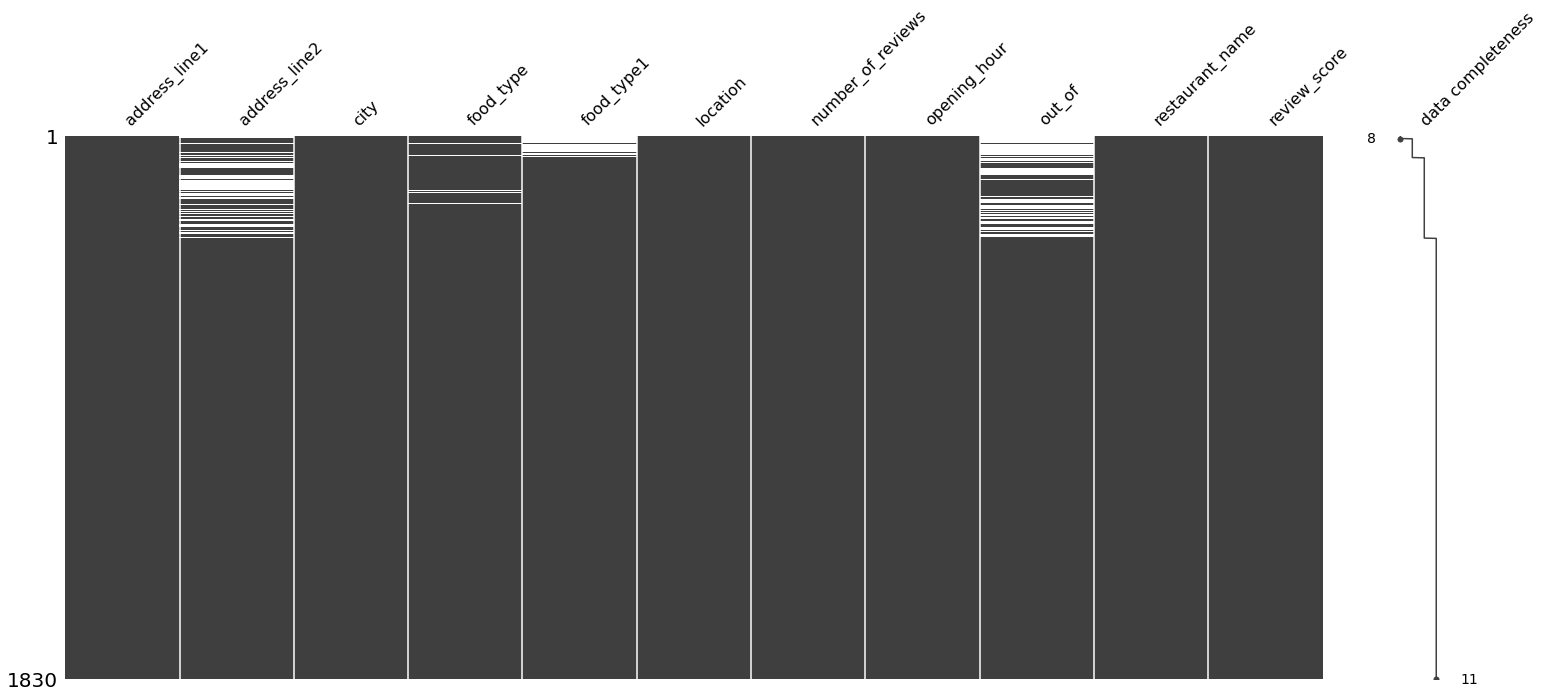

In [47]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=35)


In [7]:
df.food_type.value_counts()


Restaurants                                          135
                                                      73
  , American                                          31
, Cafe                                                29
Cafe                                                  27
                                                    ... 
, Seafood, Mediterranean, Halal                        1
  , International, Halal                               1
, Steakhouse, Mediterranean, Barbecue                  1
  , Lebanese, Middle Eastern, Vegetarian Friendly      1
, Italian, Cafe                                        1
Name: food_type, Length: 842, dtype: int64

In [8]:
df['food_type'] = df['food_type'].str.strip()
df['restaurant_name'] = df['restaurant_name'].str.strip()
df.loc[df['food_type'] == '','food_type'] = np.nan

In [9]:
df.food_type.value_counts()


Restaurants                                          135
, Cafe                                                45
, American                                            41
Cafe                                                  27
, Indian, Asian, Vegetarian Friendly                  27
                                                    ... 
, American, Central American, Vegetarian Friendly      1
, Mediterranean, European, International               1
, Fast Food, Grill, Middle Eastern                     1
, Seafood, Vegetarian Friendly, Halal                  1
, Healthy                                              1
Name: food_type, Length: 753, dtype: int64

In [10]:
df = df[~ df.food_type.str.startswith('Restaurants',na=False)]
df = df[~ df.food_type1.str.startswith('Restaurants',na=False)]
df.loc[df.food_type.isnull() & df.restaurant_name.str.contains('offee')| df.restaurant_name.str.contains('Caf')|df.restaurant_name.str.contains('Cafe') | df.restaurant_name.str.contains('cafe')|
df.restaurant_name.str.contains('Tea'), 'food_type'] = "Cafe"
df.loc[df.restaurant_name.str.contains('offee')| df.restaurant_name.str.contains('Caf')|df.restaurant_name.str.contains('Cafe') | df.restaurant_name.str.contains('cafe')|
df.restaurant_name.str.contains('Tea'), 'food_type1'] = "Cafe"

df.loc[df.food_type.isnull() & df.restaurant_name.str.contains('hawarma')|df.restaurant_name.str.contains('hawarma')|df.restaurant_name.str.contains('hawerma'),'food_type'] = 'Shawarma'
df.loc[df.restaurant_name.str.contains('hawarma')|df.restaurant_name.str.contains('hawarma')|df.restaurant_name.str.contains('hawerma'),'food_type1'] = 'Arabic'
df.loc[df.restaurant_name.str.contains('akery')| df.restaurant_name.str.contains('Bagel')|df.restaurant_name.str.contains('Pastry'), 'food_type1'] = 'Bakery'

In [11]:
df.food_type1.nunique()

90

In [12]:
df['food_type1'] = df['food_type1'].str.strip()


In [13]:
df.food_type1.nunique()

70

In [14]:
df.food_type1.value_counts()

Cafe                195
American            135
Italian             128
Indian              124
Chinese              82
                   ... 
Swedish               1
Central American      1
Caucasian             1
Eastern European      1
Persian               1
Name: food_type1, Length: 70, dtype: int64

In [15]:
df.dropna(subset =['food_type'],inplace=True)


In [16]:
df.isnull().sum()

address_line1          0
address_line2        116
city                   0
food_type              0
food_type1            48
location               0
number_of_reviews      0
opening_hour           0
out_of               189
restaurant_name        0
review_score           0
dtype: int64

In [17]:
df.food_type1 = np.where(df.food_type1.isnull(), df.food_type, df.food_type1)
df.address_line2 = np.where(df.address_line2.isnull(), df.address_line1, df.address_line2)

In [18]:
df.loc[df.food_type1.str.contains('Middle')|df.food_type1.str.contains('Lebanese')|df.food_type1.str.contains('Egyptian')|df.food_type1.str.contains('Moroccan'), 'food_type1'] = 'Arabic'

df.loc[df.food_type1.str.contains('Asian')| df.food_type1.str.contains('Korean')|df.food_type1.str.contains('Thai')|df.food_type1.str.contains('Filipino')|df.food_type1.str.contains('Uzbek')
       |df.food_type1.str.contains('Afghani')|df.food_type1.str.contains('Armenian')|df.food_type1.str.contains('Indonesian')|df.food_type1.str.contains('Pakistani')|
       df.food_type1.str.contains('Sushi')|df.food_type1.str.contains('Persian')|df.food_type1.str.contains('Japanese')|df.food_type1.str.contains('Chinese'), 'food_type1'] = 'Asian'



df.loc[df.food_type1.str.contains('Vegetarian')|df.food_type1.str.contains('Vegan'), 'food_type1'] = 'Healthy'

df.loc[df.food_type1.str.contains('American')|df.food_type1.str.contains('Hawaiian')|df.food_type1.str.contains('Canadian')|df.food_type1.str.contains('Peruvian')
       |df.food_type1.str.contains('Peruvian')|df.food_type1.str.contains('Caribbean')|df.food_type1.str.contains('Latin')|df.food_type1.str.contains('Brazilian')
       |df.food_type1.str.contains('Mexican'), 'food_type1'] = 'American'

df.loc[df.food_type1.str.contains('Fast')|df.food_type1.str.contains('Street'), 'food_type1'] = 'Fast Food'

df.loc[df.food_type1.str.contains('European')|df.food_type1.str.contains('Belgian')|df.food_type1.str.contains('Portuguese')|df.food_type1.str.contains('German')
       |df.food_type1.str.contains('Dutch')|df.food_type1.str.contains('Swedish')|df.food_type1.str.contains('French')|df.food_type1.str.contains('Greek')|df.food_type1.str.contains('Turkish'), 'food_type1'] = 'European'

df.loc[df.food_type1.str.contains('Grill')|df.food_type1.str.contains('Steakhouse')|df.food_type1.str.contains('Barbecue'), 'food_type1'] = 'BBQ'

df.loc[ df.food_type1.str.contains('Halal')|df.food_type1.str.contains('Contemporary')|df.food_type1.str.contains('Deli')|df.food_type1.str.contains('Fusion')
       |df.food_type1.str.contains('Bar')|df.food_type1.str.contains('Soups')|df.food_type1.str.contains('Caucasian')|df.food_type1.str.contains('Diner')|df.food_type1.str.contains('African') , 'food_type1'] = 'International'

In [19]:
df.food_type1.nunique()

15

In [20]:
df.food_type1.value_counts().head(52)

Asian            221
Arabic           216
Cafe             201
American         177
Italian          131
Indian           126
European         113
International     91
Seafood           79
BBQ               67
Mediterranean     58
Fast Food         50
Pizza             32
Bakery            23
Healthy           15
Name: food_type1, dtype: int64

In [21]:
df.isnull().sum()

address_line1          0
address_line2          0
city                   0
food_type              0
food_type1             0
location               0
number_of_reviews      0
opening_hour           0
out_of               189
restaurant_name        0
review_score           0
dtype: int64

In [22]:
df.out_of = df.out_of.fillna('dont have')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   address_line1      1600 non-null   object
 1   address_line2      1600 non-null   object
 2   city               1600 non-null   object
 3   food_type          1600 non-null   object
 4   food_type1         1600 non-null   object
 5   location           1600 non-null   object
 6   number_of_reviews  1600 non-null   object
 7   opening_hour       1600 non-null   object
 8   out_of             1600 non-null   object
 9   restaurant_name    1600 non-null   object
 10  review_score       1600 non-null   object
dtypes: object(11)
memory usage: 150.0+ KB


In [24]:
df.food_type.value_counts()


Cafe                                    142
, American                               38
, Indian, Asian, Vegetarian Friendly     27
, Indian                                 26
, Cafe                                   25
                                       ... 
, International, Contemporary             1
Street Food                               1
, Grill, Middle Eastern, Arabic           1
Fast Food, Diner                          1
, Healthy                                 1
Name: food_type, Length: 695, dtype: int64

In [25]:
df.loc[ df.food_type.str.contains(',') , "food_type"] = df['food_type'].str[1:]
df['food_type'] = df['food_type'].str.strip()

In [26]:
df.food_type.nunique()


674

In [27]:
df = df.reset_index(drop=True)



In [28]:
df.columns

Index(['address_line1', 'address_line2', 'city', 'food_type', 'food_type1',
       'location', 'number_of_reviews', 'opening_hour', 'out_of',
       'restaurant_name', 'review_score'],
      dtype='object')

In [29]:
df.number_of_reviews.value_counts().head(59)

0     189
1     139
2      90
3      74
5      51
4      49
7      49
8      43
6      43
9      38
13     37
15     32
10     31
14     29
11     26
12     25
16     23
19     21
18     20
25     20
17     17
28     16
30     16
22     15
23     15
31     14
24     13
20     13
35     13
26     12
21     12
48     12
34     10
40     10
29     10
27     10
44      9
36      9
32      9
41      8
49      8
38      8
39      8
43      8
51      6
61      6
81      6
62      6
50      6
59      5
74      5
57      5
47      5
42      5
53      5
68      5
95      4
37      4
33      4
Name: number_of_reviews, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   address_line1      1600 non-null   object
 1   address_line2      1600 non-null   object
 2   city               1600 non-null   object
 3   food_type          1600 non-null   object
 4   food_type1         1600 non-null   object
 5   location           1600 non-null   object
 6   number_of_reviews  1600 non-null   object
 7   opening_hour       1600 non-null   object
 8   out_of             1600 non-null   object
 9   restaurant_name    1600 non-null   object
 10  review_score       1600 non-null   object
dtypes: object(11)
memory usage: 137.6+ KB


In [31]:
df.city.value_counts()

Riyadh              563
Eastern_Province    530
Jeddah              507
Name: city, dtype: int64

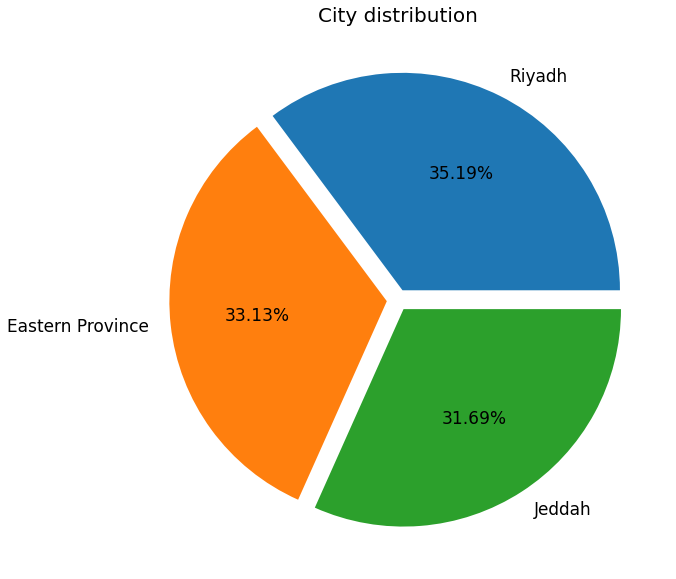

In [32]:
plt.figure(figsize=(10,10))
plt.pie(x=df['city'].value_counts(),labels=['Riyadh','Eastern Province','Jeddah'],autopct='%.2f%%',textprops={'fontsize': 17},explode=[0.05,0.05,0.05],)
plt.title('City distribution',fontdict={'fontsize':20})
plt.show()

Text(0.5, 1.0, 'categories distribution')

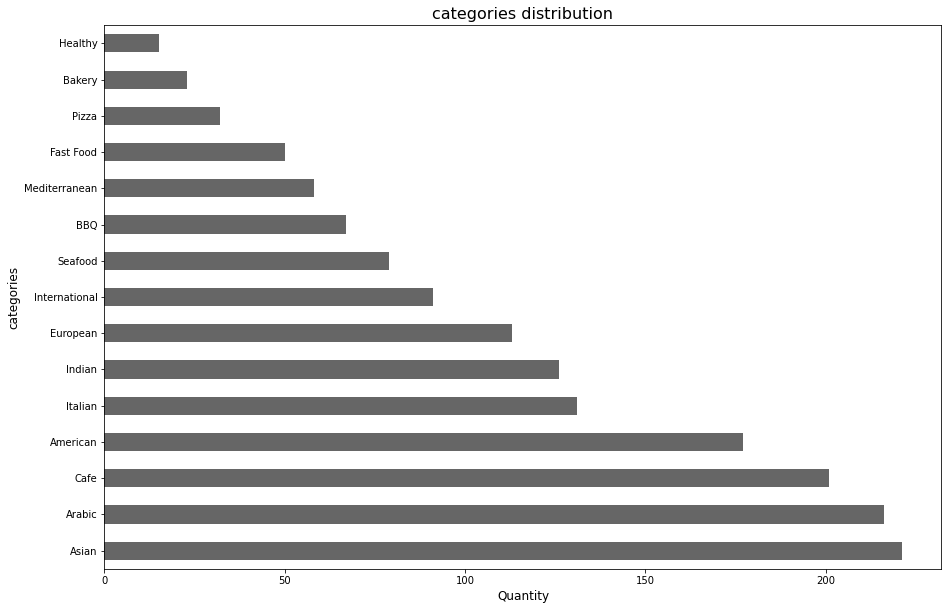

In [33]:
df['food_type1'].value_counts().head(15).plot(kind = 'barh', subplots = False, figsize = (15,10),color=['black'], alpha = .6,)

plt.ylabel('categories',fontsize=12)
plt.xlabel('Quantity',fontsize=12)
#plt.xticks(rotation=45);
plt.title('categories distribution',fontsize=16)

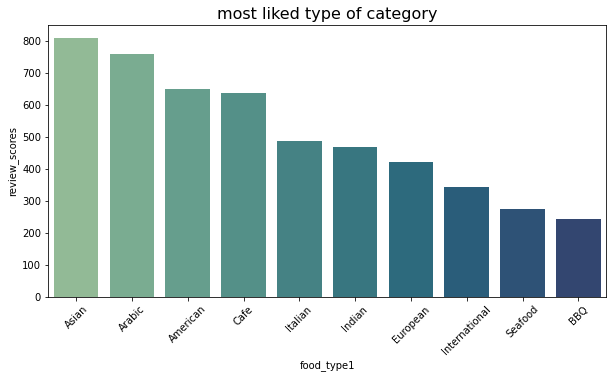

In [34]:
df['review_scores'] = df.review_score.astype(float)
top_Score = (df.groupby(['food_type1'], as_index=False))[['review_scores']].sum().sort_values(ascending=False,by='review_scores')
plt.figure(figsize=[10,5])
sns.barplot(x='food_type1',y='review_scores' ,data=top_Score.head(10), palette='crest')
plt.title('most liked type of category',fontsize=16)
plt.xticks(rotation=45);

In [35]:
df.to_csv("Data/clean_data.csv")

In [36]:
df

,address_line1,address_line2,city,food_type,food_type1,location,number_of_reviews,opening_hour,out_of,restaurant_name,review_score,review_scores
0,King Saud Road,Al Khobar 31952 Saudi Arabia,Eastern_Province,"International, Vegan Options, Vegetarian Friendly",International,"King Saud Road, Al Khobar 31952 Saudi Arabia",101,+ Add hours,1 of 29 International in Al Khobar,Kempinski Al Othman Hotel,5.0,5.0
1,Prince Musaed Street Dughaither Leisure Island,Al Khobar Saudi Arabia,Eastern_Province,"Seafood, International, Mediterranean",Seafood,Prince Musaed Street Dughaither Leisure Island...,916,Closed Now:See all hours,1 of 20 Seafood in Al Khobar,Al-Sanbok Seafood Restaurant,4.5,4.5
2,Prince Musaid Street,34425 Al Khobar,Eastern_Province,"Japanese, Sushi, Asian",Asian,"Prince Musaid Street, 34425 Al Khobar, Al Khob...",59,+ Add hours,1 of 11 Japanese in Al Khobar,Taki Restaurant,5.0,5.0
3,King Saud Road Kempinski Al Othman Hotel,Al Khobar 31952 Saudi Arabia,Eastern_Province,"Italian, Pizza, Romana",Italian,"King Saud Road Kempinski Al Othman Hotel, Al K...",56,Closed Now:See all hours,1 of 31 Italian in Al Khobar,il Vero,5.0,5.0
4,Fouad Center _ Corniche Street,Al Khobar Saudi Arabia,Eastern_Province,"American, Steakhouse, Vegetarian Friendly",American,"Fouad Center _ Corniche Street, Al Khobar Saud...",331,+ Add hours,1 of 40 American in Al Khobar,Outback Steakhouse,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Al Qasar Street,Riyadh 13226 Saudi Arabia,Riyadh,"ndian, Middle Eastern, Pakistani, Arabic",Arabic,"Al Qasar Street, Riyadh 13226 Saudi Arabia",0,Open Now:See all hours,dont have,Usmania Restaurant,0,0.0
1596,Takhassusi Street Al Mohammadiyah,Riyadh 12362 Saudi Arabia,Riyadh,"French, Pizza, Fast Food",European,"Takhassusi Street Al Mohammadiyah, Riyadh 1236...",0,+ Add hours,dont have,May Snack,0,0.0
1597,Anas Ibn Malik Rd,Riyadh 13525 Saudi Arabia,Riyadh,Healthy,Healthy,"Anas Ibn Malik Rd, Riyadh 13525 Saudi Arabia",0,Opens in 18 min:See all hours,dont have,My Calorie,0,0.0
1598,King Saud Road,Opp. Banque Saudi Fransi.,Riyadh,"Chinese, Indian",Asian,"King Saud Road, Opp. Banque Saudi Fransi., Riy...",0,+ Add hours,dont have,Garden Restaurant,0,0.0


In [37]:
# helper function to get the indices
def get_index(restaurant_name):
    return df[df.restaurant_name == restaurant_name].index[0]

def get_title_from_index(index):
    return df[df.index == index]["restaurant_name"].values[0]

#def get_price(index):
#    return df[df.index == index]["price"].values[0]


#step1: select features 
features_df = ['review_score','out_of', 'city', 'food_type', 'food_type1','location', 'number_of_reviews', 'opening_hour']

for feature in features_df:
    df[feature] = df[feature].fillna('')

#step2: combine features 
def comine_features(row):
    try:
        return row['review_score']+ " "+row['out_of'] + " "+row['city']+" "+row['food_type'] + " "+row['food_type1'] + " "+row['location']+" "+row['number_of_reviews']+" "+row['opening_hour']
    except:
        print("Error:", row)

df['combined_features'] = df.apply(comine_features, axis=1)

#step3: create recommendation function
def cv_recommend(x):

#step4: creat count matrix 
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(df['combined_features'])

#step5: cosine similarity 
    cosine_sim = cosine_similarity(count_matrix)

#step6: getting the index of the recommended restaurant 
    rest_index = get_index(x)
    similar_rest = list(enumerate(cosine_sim[rest_index]))
    sorted_similar = sorted(similar_rest,key=lambda x:x[1],reverse=True)[1:]

    i=0
    print("Top 5 similar rest to "+x+" are:\n")
    for element in sorted_similar:
        print( get_title_from_index(element[0]), f"  >>>>>>>   score: ", format(sorted_similar[i][1], ".4f"))
        i=i+1
        if i>=5:
            break

def tfidf_recommend(x):
     
    #Define a TF-IDF Vectorizer Object. Remove all english stopwords
    
    #Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['combined_features'])


#step5: cosine similarity 
    cosine_sim = cosine_similarity(tfidf_matrix)

#step6: getting the index of the recommended restaurant 
    rest_index = get_index(x)
    similar_rest = list(enumerate(cosine_sim[rest_index]))
    sorted_similar = sorted(similar_rest,key=lambda x:x[1],reverse=True)[1:]

    i=0
    print("Top 5 similar rest to "+x+" are:\n")
    for element in sorted_similar:
        print( get_title_from_index(element[0]), f"  >>>>>>>  score: ", format(sorted_similar[i][1], ".4f"))
        i=i+1
        if i>=5:
            break


In [38]:
cv_recommend("Taki Restaurant")

Top 5 similar rest to Taki Restaurant are:

Orient   >>>>>>>   score:  0.9250
Takara   >>>>>>>   score:  0.8854
Kyoto Japanese Restaurant   >>>>>>>   score:  0.8808
Masami Sushi   >>>>>>>   score:  0.8714
Kodo   >>>>>>>   score:  0.8552


In [39]:
tfidf_recommend("Taki Restaurant")

Top 5 similar rest to Taki Restaurant are:

Century Cuisine   >>>>>>>  score:  0.7347
Orient   >>>>>>>  score:  0.6753
Kyoto Japanese Restaurant   >>>>>>>  score:  0.6593
Masami Sushi   >>>>>>>  score:  0.6268
Takara   >>>>>>>  score:  0.6266
